# Aula Completa: Fundamentos de Machine Learning

Este notebook guia os alunos desde a criação do primeiro modelo de classificação, passando por técnicas de validação, o conceito de regressão, e chegando a tópicos mais avançados como otimização de modelos e ensembles.

**Estrutura da Aula:**
* **Módulo 1:** Introdução à Classificação - O Dataset Iris
* **Módulo 2:** Validação de Modelos e Overfitting com Pokémons
* **Módulo 3:** Regressão e Tópicos Avançados

## Módulo 1: Seu Primeiro Modelo de Machine Learning

**Introdução para os alunos:** "Olá, pessoal! Hoje vamos construir nosso primeiro modelo de Machine Learning. O objetivo é ensinar o computador a classificar flores de diferentes espécies com base em suas características, como o tamanho das pétalas. Usaremos um famoso conjunto de dados chamado Iris."

### 1. Carregando os Dados e Ferramentas
**Explicação:** "Nosso primeiro passo é importar as 'ferramentas' que vamos usar (as bibliotecas) e carregar nosso conjunto de dados. Vamos usar o `scikit-learn`, a principal biblioteca de Machine Learning em Python. O dataset Iris já vem pronto para uso dentro dela."

In [1]:
# Passo 1: Importar as bibliotecas necessárias
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Passo 2: Carregar o dataset Iris
iris = load_iris()
X = iris.data  # Características (comprimento e largura das pétalas e sépalas)
y = iris.target  # Rótulos (espécies das flores)

print("Dados carregados com sucesso!")
print("Número de amostras:", X.shape[0])
print("Número de características:", X.shape[1])

Dados carregados com sucesso!
Número de amostras: 150
Número de características: 4


### 2. Separando Dados para Treino e Teste
**Explicação:** "Uma regra fundamental em Machine Learning é nunca testar o modelo com os mesmos dados que usamos para treiná-lo. Seria como dar as respostas da prova para o aluno antes de ele estudar! Por isso, vamos dividir nossos dados: uma parte maior para 'treinar' o modelo (dados de treino) e uma parte menor para 'testá-lo' de forma justa (dados de teste)."

In [2]:
# Passo 3: Dividir os dados em treino e teste
# test_size=0.3 significa que 30% dos dados serão para teste e 70% para treino.
# random_state=42 garante que a divisão seja sempre a mesma, para que nossos resultados sejam reproduzíveis.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Tamanho dos dados de treino:", X_train.shape)
print("Tamanho dos dados de teste:", X_test.shape)

Tamanho dos dados de treino: (105, 4)
Tamanho dos dados de teste: (45, 4)


### 3. Treinando um Modelo de Árvore de Decisão
**Explicação:** "Agora, vamos usar nosso primeiro algoritmo: a **Árvore de Decisão**. Pense nela como um fluxograma de perguntas ('a pétala é maior que X? Se sim, vá para a direita...'). O modelo aprenderá a criar as melhores perguntas para separar as espécies de flores usando os dados de treino."

In [3]:
# Passo 4: Treinar o modelo de Árvore de Decisão
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

print("Modelo de Árvore de Decisão treinado!")

Modelo de Árvore de Decisão treinado!


### 4. Avaliando o Modelo de Árvore de Decisão
**Explicação:** "Com o modelo treinado, vamos ver se ele é bom! Faremos previsões nos dados de teste (que ele nunca viu) e compararemos com as respostas corretas. A **acurácia** nos dirá a porcentagem de acertos do nosso modelo."

In [4]:
# Passo 5: Fazer previsões e avaliar o modelo
y_pred_tree = tree_model.predict(X_test)
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f"Acurácia da Árvore de Decisão: {accuracy_tree * 100:.2f}%")

Acurácia da Árvore de Decisão: 100.00%


### 5. Treinando um Segundo Modelo: KNN
**Explicação:** "Será que outro algoritmo se sairia melhor? Vamos testar o **K-Nearest Neighbors (KNN)**. Ele classifica uma nova flor com base na espécie da maioria de suas 'vizinhas' mais próximas nos dados de treino. É uma abordagem diferente da Árvore de Decisão."

In [5]:
# Passo 6: Treinar e avaliar o KNN
# Normalizando os dados, pois o KNN é sensível à escala das features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_model = KNeighborsClassifier()
knn_model.fit(X_train_scaled, y_train)

# Fazer previsões e avaliar
y_pred_knn = knn_model.predict(X_test_scaled)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"Acurácia do KNN: {accuracy_knn * 100:.2f}%")

Acurácia do KNN: 100.00%


---

## Módulo 2: Como Avaliar Modelos Corretamente

**Introdução para os alunos:** "No módulo anterior, fizemos uma simples divisão de treino e teste. Mas será que isso é suficiente? E se, por acaso, os dados de teste forem muito fáceis? Agora, vamos aprender técnicas de **validação cruzada**, que são formas mais robustas de medir o desempenho de um modelo. Para deixar mais divertido, vamos usar um dataset de Pokémons!"

### 1. Preparando os Dados dos Pokémons
**Explicação:** "Vamos criar um pequeno dataset com Pokémons de Fogo e Água, usando seus status de Ataque e Velocidade. Nosso objetivo será classificar se um Pokémon é de Fogo ou Água com base nesses atributos. Como o computador só entende números, vamos converter 'Fogo' e 'Água' para 1 e 0."

In [6]:
# Importação das bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, KFold, LeaveOneOut, StratifiedKFold, ShuffleSplit
from matplotlib.colors import ListedColormap
from matplotlib.lines import Line2D

# 2. Definição dos dados
data = {
    'Nome': ['Charmander', 'Squirtle', 'Growlithe', 'Psyduck', 'Vulpix', 'Poliwag',
             'Magmar', 'Tentacool', 'Cyndaquil', 'Totodile', 'Torchic', 'Mudkip',
             'Chimchar', 'Piplup', 'Fennekin', 'Froakie'],
    'Tipo': ['Fogo', 'Água', 'Fogo', 'Água', 'Fogo', 'Água',
             'Fogo', 'Água', 'Fogo', 'Água', 'Fogo', 'Água',
             'Fogo', 'Água', 'Fogo', 'Água'],
    'Attack': [52, 48, 70, 52, 50, 50, 95, 40, 49, 65, 60, 70, 58, 51, 61, 56],
    'Speed': [65, 43, 60, 55, 65, 90, 93, 70, 65, 43, 45, 40, 61, 50, 72, 71]
}
# 3. Criando DataFrame
df_pokemon = pd.DataFrame(data)

# 4. Codificação dos tipos: Fogo = 1, Água = 0
le = LabelEncoder()
df_pokemon['TipoNum'] = le.fit_transform(df_pokemon['Tipo'])
# Nota: LabelEncoder atribui em ordem alfabética. 'Água' se torna 0, 'Fogo' se torna 1.

# 5. Separação de features (X) e target (y)
X_poke = df_pokemon[['Attack', 'Speed']].values
y_poke = df_pokemon['TipoNum'].values

df_pokemon.head()

,Nome,Tipo,Attack,Speed,TipoNum
0,Charmander,Fogo,52,65,0
1,Squirtle,Água,48,43,1
2,Growlithe,Fogo,70,60,0
3,Psyduck,Água,52,55,1
4,Vulpix,Fogo,50,65,0


### 2. Função para Visualização
**Explicação:** "Para entendermos melhor o que o modelo está fazendo, criamos esta função. Ela irá plotar um gráfico mostrando como o modelo divide o 'mundo dos Pokémons' (com base em Ataque e Velocidade) em duas regiões: a região que ele classifica como 'Água' e a que ele classifica como 'Fogo'. Isso é chamado de **fronteira de decisão**."

In [7]:
def plot_model(model, X, y, X_train, y_train, X_test, y_test, title):
    # Geração da grade para a região de decisão
    x_min, x_max = X[:, 0].min() - 5, X[:, 0].max() + 5
    y_min, y_max = X[:, 1].min() - 5, X[:, 1].max() + 5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                         np.linspace(y_min, y_max, 500))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot da figura
    plt.figure(figsize=(10, 6))
    # 'Água' (0) será azul, 'Fogo' (1) será vermelho
    cmap_background = ListedColormap(['#87CEFA', '#FFB6C1']) # Azul claro e Vermelho claro
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_background)

    # Mapear os pontos de dados
    cmap_points = ListedColormap(['blue', 'red'])
    # Pontos de Treino (círculos)
    scatter_train = plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_points, edgecolor='k', marker='o', s=100, label='Treino')
    # Pontos de Teste (quadrados)
    scatter_test = plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_points, edgecolor='k', marker='s', s=100, label='Teste')
    
    # Legenda
    legend_elements = [
        Line2D([0], [0], marker='o', color='w', label='Água (Treino)', markerfacecolor='blue', markersize=10),
        Line2D([0], [0], marker='o', color='w', label='Fogo (Treino)', markerfacecolor='red', markersize=10),
        Line2D([0], [0], marker='s', color='w', label='Água (Teste)', markerfacecolor='blue', markersize=10),
        Line2D([0], [0], marker='s', color='w', label='Fogo (Teste)', markerfacecolor='red', markersize=10)
    ]
    plt.legend(handles=legend_elements, loc='upper right')

    plt.title(title)
    plt.xlabel('Attack')
    plt.ylabel('Speed')
    plt.grid(True)
    plt.show()

    print(f'Acurácia Treino: {model.score(X_train, y_train):.2f}')
    print(f'Acurácia Teste: {model.score(X_test, y_test):.2f}')

### 3. Técnicas de Validação Cruzada

#### **3.1 Validação Hold-Out (Recapitulando)**
**Explicação:** "Esta é a abordagem que já vimos: uma única divisão entre treino e teste. É simples e rápida, mas o resultado pode variar muito dependendo de como os dados foram divididos 'na sorte'."

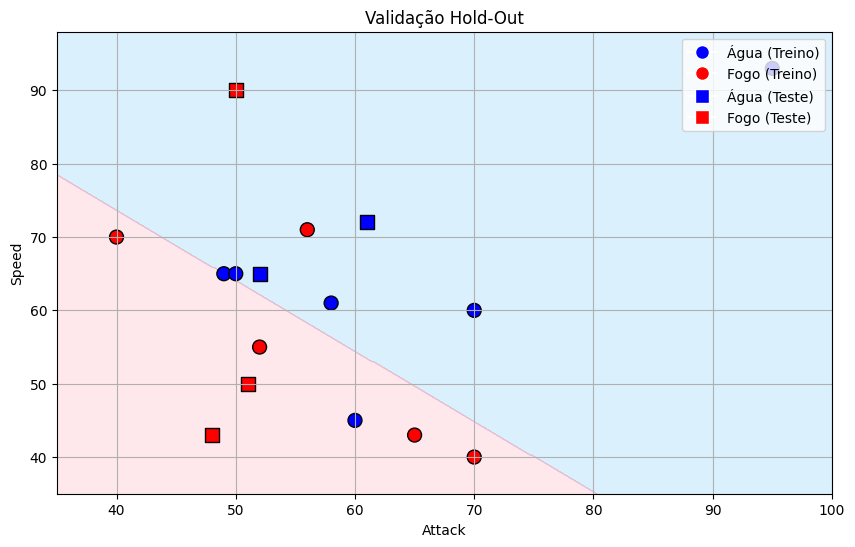

Acurácia Treino: 0.82
Acurácia Teste: 0.80


In [8]:
# 6. Separação padrão para treino/teste (Hold-Out)
X_train_h, X_test_h, y_train_h, y_test_h = train_test_split(X_poke, y_poke, test_size=0.3, random_state=42)
model_holdout = LogisticRegression()
model_holdout.fit(X_train_h, y_train_h)
plot_model(model_holdout, X_poke, y_poke, X_train_h, y_train_h, X_test_h, y_test_h, 'Validação Hold-Out')

#### **3.2 Validação K-Fold**
**Explicação:** "A validação **K-Fold** é uma técnica mais poderosa. Em vez de uma única divisão, ela divide os dados em 'K' partes (aqui, 4). A cada rodada, uma parte é usada para teste e as outras para treino. O processo se repete 'K' vezes. No final, tiramos a média dos resultados, o que nos dá uma estimativa muito mais confiável do desempenho do modelo."

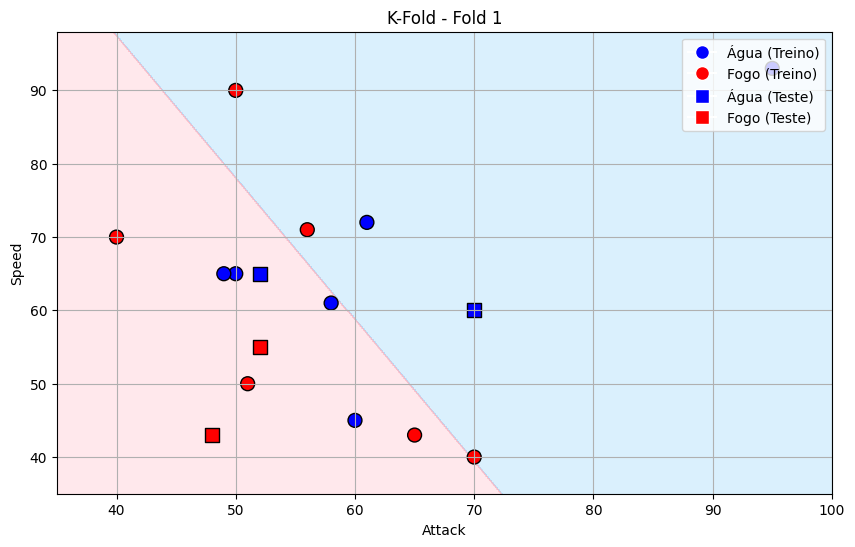

Acurácia Treino: 0.42
Acurácia Teste: 0.75


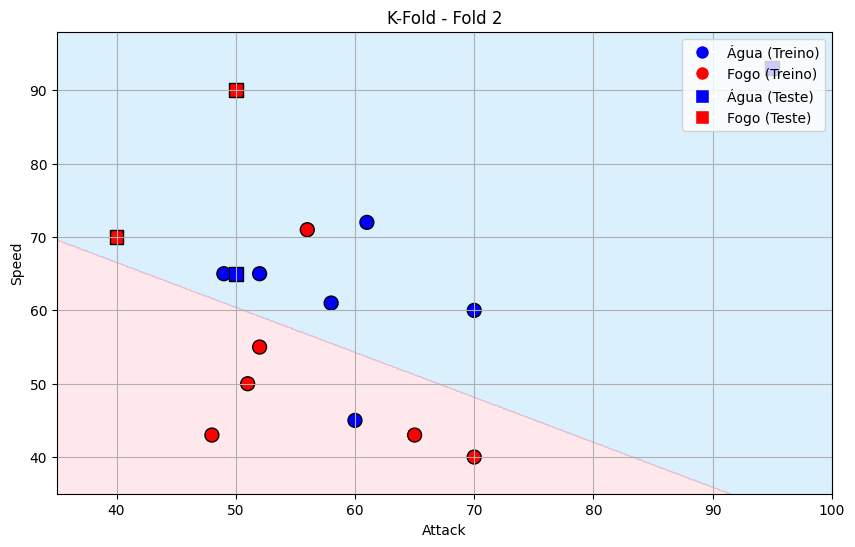

Acurácia Treino: 0.83
Acurácia Teste: 0.50


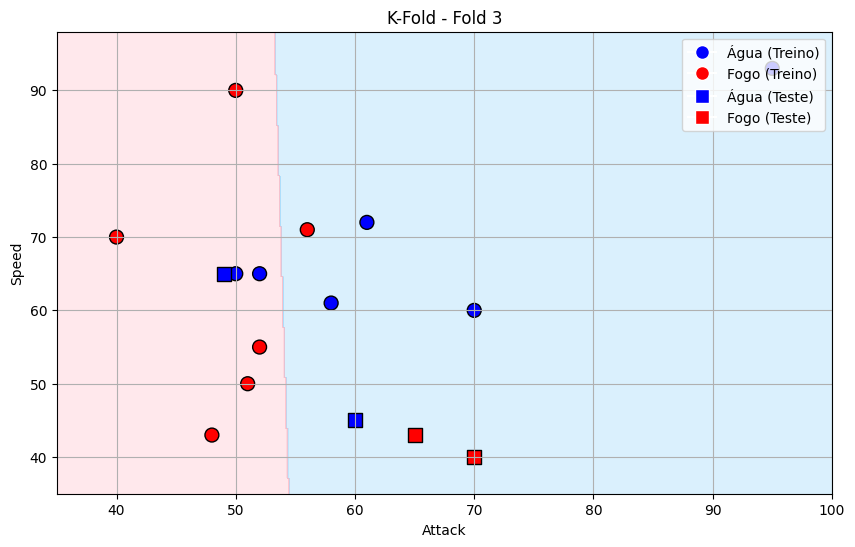

Acurácia Treino: 0.75
Acurácia Teste: 0.25


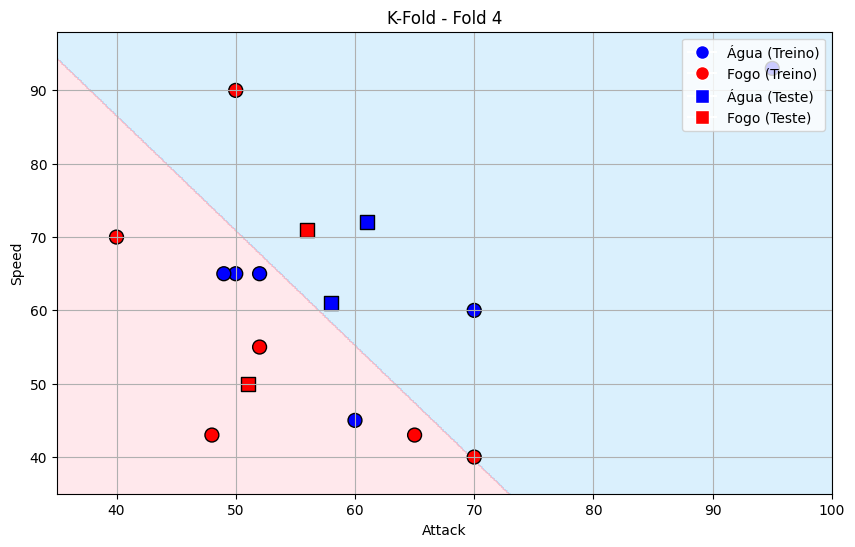

Acurácia Treino: 0.50
Acurácia Teste: 0.75


In [9]:
# 8. K-Fold
kf = KFold(n_splits=4)
for fold, (train_idx, test_idx) in enumerate(kf.split(X_poke)):
    model_kf = LogisticRegression()
    model_kf.fit(X_poke[train_idx], y_poke[train_idx])
    plot_model(model_kf, X_poke, y_poke, X_poke[train_idx], y_poke[train_idx], X_poke[test_idx], y_poke[test_idx], f'K-Fold - Fold {fold+1}')

#### **3.3 Validação Estratificada (Stratified K-Fold)**
**Explicação:** "O K-Fold simples pode, por sorte, criar uma partição de teste com apenas um tipo de Pokémon. O **Stratified K-Fold** resolve isso, garantindo que cada partição (ou 'fold') tenha a mesma proporção de classes (mesma porcentagem de Pokémons de Fogo e Água) que o dataset original. É a abordagem mais recomendada para classificação."

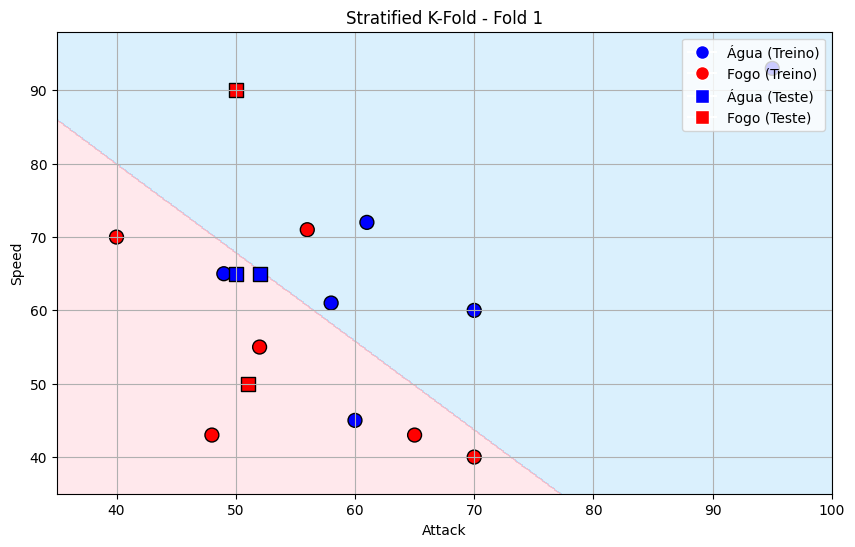

Acurácia Treino: 0.75
Acurácia Teste: 0.25


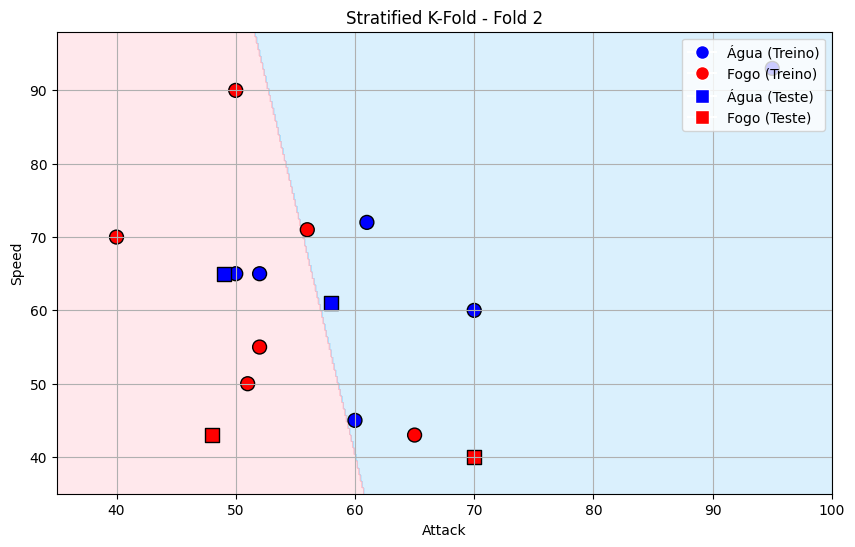

Acurácia Treino: 0.67
Acurácia Teste: 0.50


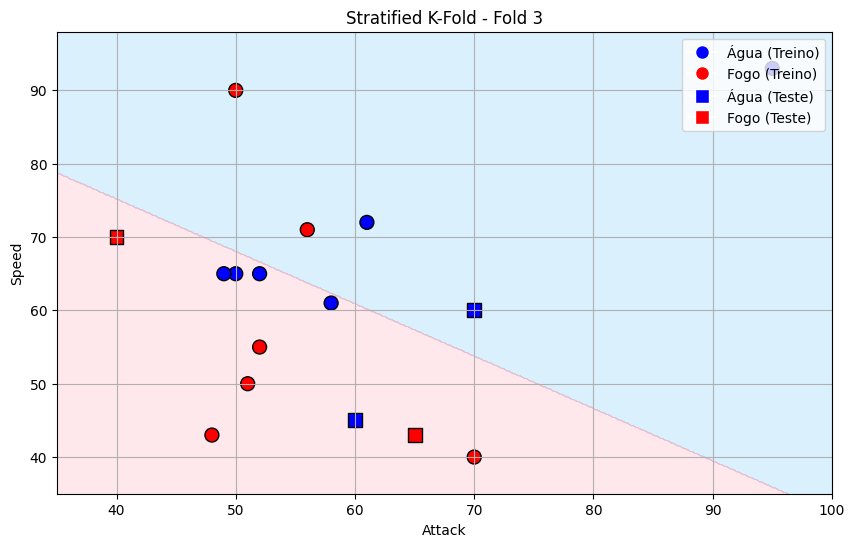

Acurácia Treino: 0.50
Acurácia Teste: 0.75


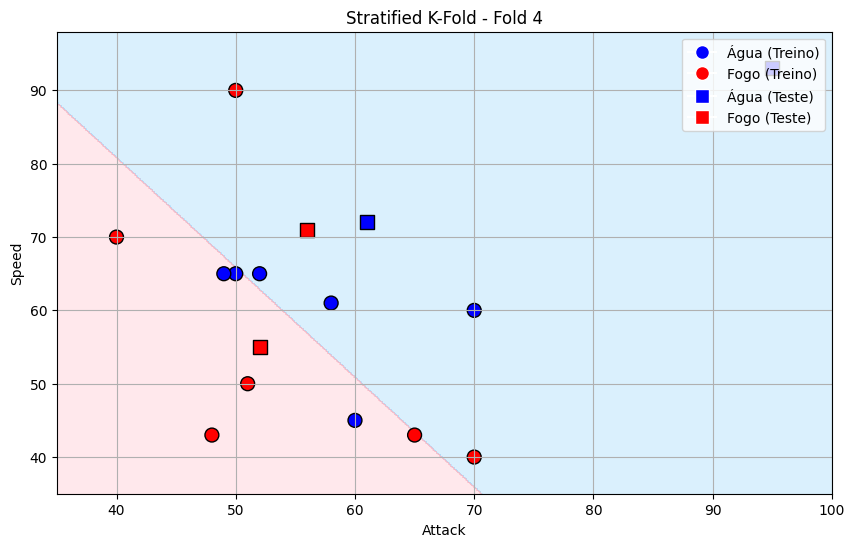

Acurácia Treino: 0.58
Acurácia Teste: 0.75


In [10]:
# 10. Stratified K-Fold
skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)
for fold, (train_idx, test_idx) in enumerate(skf.split(X_poke, y_poke)):
    model_skf = LogisticRegression()
    model_skf.fit(X_poke[train_idx], y_poke[train_idx])
    plot_model(model_skf, X_poke, y_poke, X_poke[train_idx], y_poke[train_idx], X_poke[test_idx], y_poke[test_idx], f'Stratified K-Fold - Fold {fold+1}')

### 4. Subajuste e Sobreajuste (Underfitting e Overfitting)
**Explicação:** "Agora, um conceito crucial: o equilíbrio do modelo. Um modelo muito simples pode não aprender bem (**subajuste**), e um muito complexo pode 'decorar' os dados de treino e errar em dados novos (**sobreajuste**). Vamos visualizar esses dois cenários."

**Subajuste:** "Este modelo é muito 'rígido'. Ele traça uma fronteira simples e não consegue capturar bem a separação dos dados, resultando em baixa acurácia tanto no treino quanto no teste."

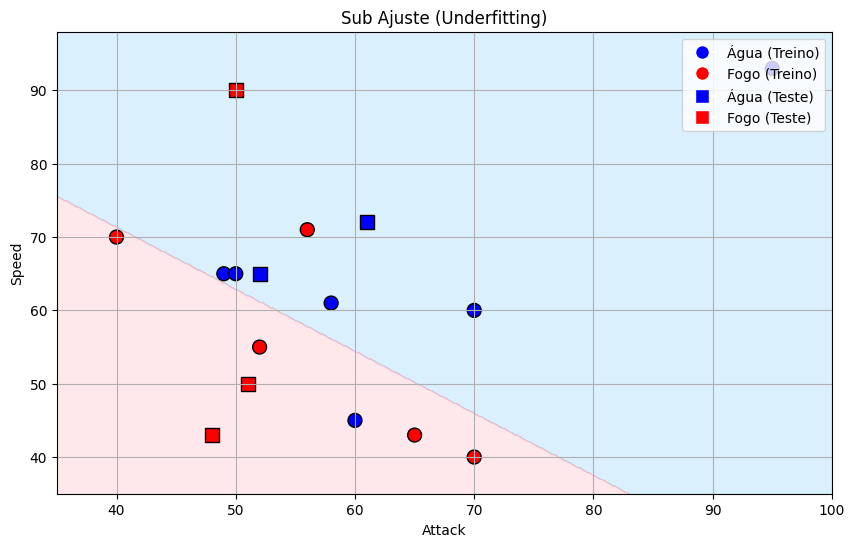

Acurácia Treino: 0.82
Acurácia Teste: 0.80


In [11]:
# 12. Sub Ajuste (Modelo muito simples)
model_sub = LogisticRegression(C=0.01)  # C pequeno torna o modelo menos flexível
model_sub.fit(X_train_h, y_train_h)
plot_model(model_sub, X_poke, y_poke, X_train_h, y_train_h, X_test_h, y_test_h, 'Sub Ajuste (Underfitting)')

**Sobreajuste:** "Este modelo é complexo demais. Ele cria uma fronteira de decisão que se contorce para acertar cada ponto do treino, mas provavelmente errará em dados novos. Veja como a acurácia de treino é perfeita (1.00), mas a de teste é menor, indicando que ele não generaliza bem."

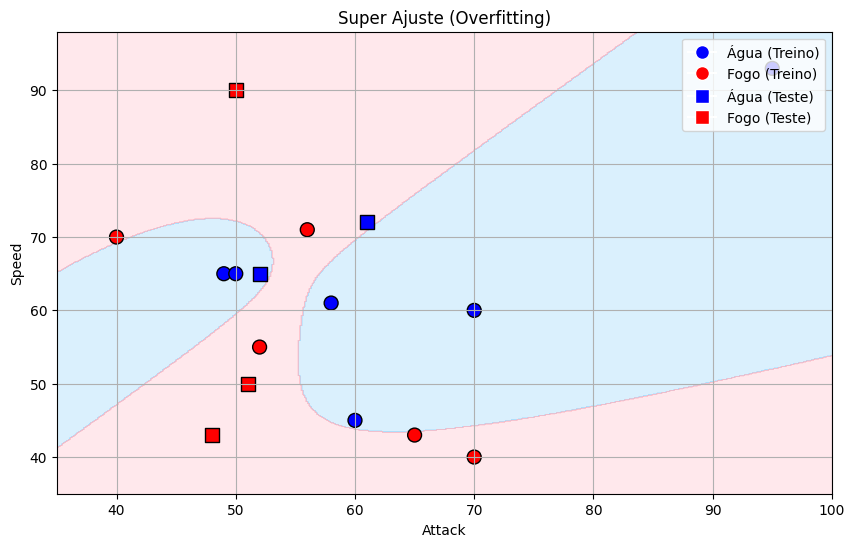

Acurácia Treino: 1.00
Acurácia Teste: 0.80


In [12]:
# 13. Super Ajuste (Modelo muito complexo)
model_super = make_pipeline(PolynomialFeatures(degree=4), LogisticRegression(max_iter=1000))
model_super.fit(X_train_h, y_train_h)
plot_model(model_super, X_poke, y_poke, X_train_h, y_train_h, X_test_h, y_test_h, 'Super Ajuste (Overfitting)')

---

## Módulo 3: Regressão e Tópicos Avançados

**Introdução para os alunos:** "Até agora, fizemos classificação (prever uma categoria). Agora, vamos aprender sobre **regressão**: prever um valor numérico contínuo, como o preço de uma casa. Também vamos ver técnicas mais avançadas para melhorar e entender nossos modelos."

### **AVISO IMPORTANTE PARA O PROFESSOR:**
**Explicação:** "Às vezes, ao baixar datasets, podemos encontrar um erro de certificado SSL. Isso é um problema comum de configuração. O código abaixo é uma solução simples que nos permite prosseguir com o download para a nossa aula."

In [13]:
# --- CÓDIGO DE CORREÇÃO DO ERRO SSL ---
# Adicione este bloco no início do seu notebook para evitar problemas de download
import ssl
try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context
# --- FIM DA CORREÇÃO ---

### 1. Prevendo Preços de Imóveis com Regressão Linear
**Explicação:** "Nossa tarefa aqui é prever o preço de casas na Califórnia. Usaremos a **Regressão Linear**, que tenta encontrar a melhor linha reta que descreve a relação entre as características e o preço. Vamos avaliar o modelo com métricas como **MSE** (erro médio quadrático) e **R²** (quão bem o modelo explica os dados)."

In [14]:
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Carregar o conjunto de dados
california = fetch_california_housing()
df_housing = pd.DataFrame(california.data, columns=california.feature_names)
df_housing['PRICE'] = california.target

X_h = df_housing.drop('PRICE', axis=1)
y_h = df_housing['PRICE']
X_train_h, X_test_h, y_train_h, y_test_h = train_test_split(X_h, y_h, test_size=0.3, random_state=42)

# Treinar o modelo de Regressão Linear
model_lin = LinearRegression()
model_lin.fit(X_train_h, y_train_h)

# Fazer previsões e avaliar
y_pred_lin = model_lin.predict(X_test_h)
mse = mean_squared_error(y_test_h, y_pred_lin)
r2 = r2_score(y_test_h, y_pred_lin)

print(f"Erro Quadrático Médio (MSE): {mse:.2f}")
print(f"Coeficiente de Determinação (R²): {r2:.2f}")

Erro Quadrático Médio (MSE): 0.53
Coeficiente de Determinação (R²): 0.60


### 2. Entendendo a Importância das Features
**Explicação:** "Como saber quais características são mais importantes para a previsão do modelo? Alguns modelos, como o *Random Forest*, conseguem nos dar essa informação. Vamos treinar um modelo para prever a progressão de diabetes e ver quais fatores médicos são mais relevantes segundo ele."

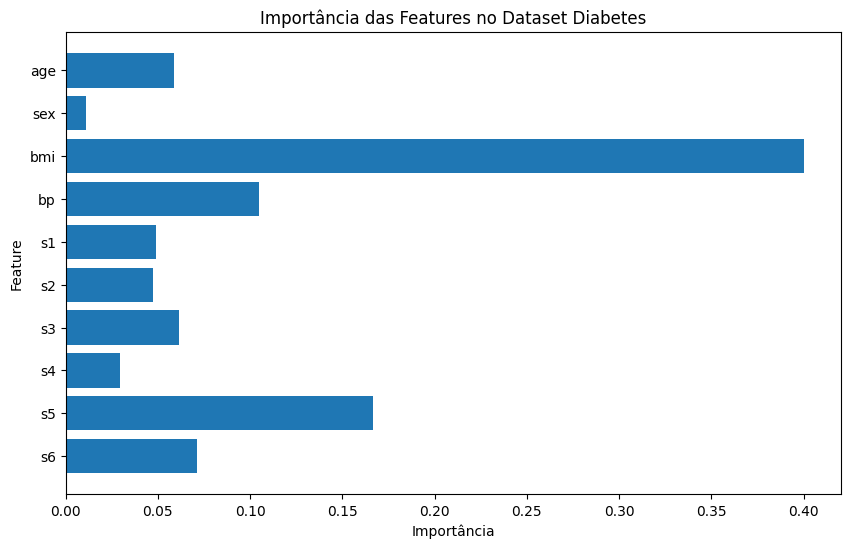

In [15]:
from sklearn.datasets import load_diabetes
from sklearn.ensemble import RandomForestRegressor

# Carregar o dataset Diabetes
diabetes = load_diabetes()
X_d = diabetes.data
y_d = diabetes.target
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X_d, y_d, test_size=0.3, random_state=42)

# Criar e treinar o modelo RandomForestRegressor
model_rf_feat = RandomForestRegressor(random_state=42)
model_rf_feat.fit(X_train_d, y_train_d)

# Obter e visualizar a importância das features
importances = model_rf_feat.feature_importances_
feature_names = diabetes.feature_names

plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances)
plt.title("Importância das Features no Dataset Diabetes")
plt.xlabel("Importância")
plt.ylabel("Feature")
plt.gca().invert_yaxis() # Para mostrar a mais importante no topo
plt.show()

### 3. Otimizando o Modelo com GridSearchCV
**Explicação:** "Os modelos de Machine Learning têm 'botões' que podemos ajustar, chamados **hiperparâmetros**. Achar a combinação ideal pode melhorar muito o desempenho. O `GridSearchCV` testa várias combinações para nós e encontra a melhor, automatizando esse processo de otimização."

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

# Definir hiperparâmetros para otimização
param_grid = {
    'max_depth': [3, 5, 7, 10],          # Profundidade máxima da árvore
    'min_samples_split': [2, 5, 10],   # Mínimo de amostras para dividir um nó
    'min_samples_leaf': [1, 2, 4]      # Mínimo de amostras por folha
}

# Aplicar GridSearch no dataset de casas da Califórnia
grid_search = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_h, y_train_h)

print(f"Melhores parâmetros encontrados: {grid_search.best_params_}")

Melhores parâmetros encontrados: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}


### 4. Modelos Avançados: Ensembles
**Explicação:** "Finalmente, vamos conhecer os modelos de **ensemble**, que são como 'times' de modelos mais simples trabalhando juntos. *Random Forest* e *Gradient Boosting* são dois dos mais poderosos e populares. Eles costumam dar resultados muito mais precisos do que um único modelo."

Random Forest - R²: 0.78
Gradient Boosting - R²: 0.82


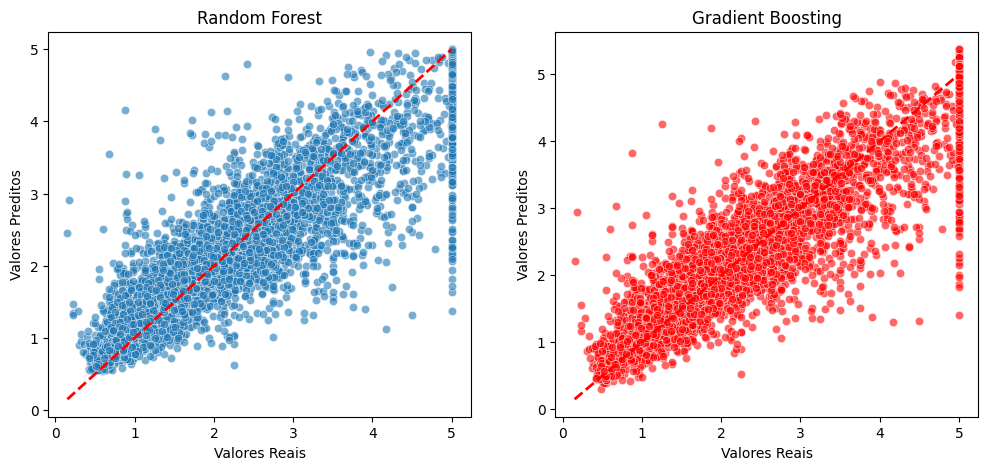

In [18]:
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Criar e treinar modelos ensemble
rf_model_ens = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
gb_model_ens = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)

rf_model_ens.fit(X_train_h, y_train_h)
gb_model_ens.fit(X_train_h, y_train_h)

# Fazer previsões
y_pred_rf = rf_model_ens.predict(X_test_h)
y_pred_gb = gb_model_ens.predict(X_test_h)

# Avaliar os modelos
print(f"Random Forest - R²: {r2_score(y_test_h, y_pred_rf):.2f}")
print(f"Gradient Boosting - R²: {r2_score(y_test_h, y_pred_gb):.2f}")

# Visualizar os resultados
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test_h, y=y_pred_rf, alpha=0.6)
plt.plot([min(y_test_h), max(y_test_h)], [min(y_test_h), max(y_test_h)], '--r', linewidth=2)
plt.xlabel("Valores Reais")
plt.ylabel("Valores Preditos")
plt.title("Random Forest")

plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test_h, y=y_pred_gb, alpha=0.6, color='red')
plt.plot([min(y_test_h), max(y_test_h)], [min(y_test_h), max(y_test_h)], '--r', linewidth=2)
plt.xlabel("Valores Reais")
plt.ylabel("Valores Preditos")
plt.title("Gradient Boosting")

plt.show()